## 미션 소개
- LLM이 외부 문서의 정보를 참고하여 답변할 수 있도록 RAG를 구현해 보는 미션
- LangChain을 이용해 RAG 시스템을 구현한 뒤, 사용된 문서와 관련된 질문을 하고 적절한 답변이 나오는지 확인

## 사용 데이터셋
- 2024년원천징수의무자를위한연말정산신고안내.pdf
- 연말정산 절차, 각종 공제 항목, 유의사항은 물론이고 2024년 기준으로 개정된 세법에 대한 정보 포함

## 문서 로드 및 청킹(Chunking)

## PyPDFLoader vs PyMuPDFLoader

- PyPDFLoader : 일반적인 텍스트 중심 PDF
- PyMuPDFLoader : 레이아웃이 중요하거나 추출이 잘 안 될 때 , 줄 간격, 표, 이미지가 있는 PDF

- 추가 공부 : PDFPlumber
 - pdfplumber는 PDF 파일에서 텍스트, 표(table), 이미지 등의 요소를 구조화된 형태로 추출할 수 있게 해주는 Python 라이브러리입니다. 특히 표 형식 데이터 추출에 강점이 있으며, PDF 내의 텍스트 좌표 정보까지 제공해줘서 위치 기반 처리가 가능합니다.

In [2]:
!pip install -U langchain-community
!pip install pymupdf
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.7/309.7 kB 21.6 MB/s eta 0:00:00


In [3]:
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.document_loaders import PyPDFLoader

In [4]:
pdf_filepath = '2024년원천징수의무자를위한연말정산신고안내.pdf'

In [5]:
loader = PyPDFLoader(pdf_filepath)
documents_pdf = loader.load()

In [6]:
loader = PyMuPDFLoader(pdf_filepath)
documents_mupdf = loader.load()

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 100, # 청크 사이의 겹치는 구간
    length_function = len,
    is_separator_regex = False)

In [8]:
split_docs_pdf = text_splitter.split_documents(documents_pdf)
split_docs_mupdf = text_splitter.split_documents(documents_mupdf)

In [9]:
print(f"총 청크 수: {len(split_docs_pdf)}")
print(f"총 청크 수: {len(split_docs_mupdf)}")

총 청크 수: 1119
총 청크 수: 1114


## 표지

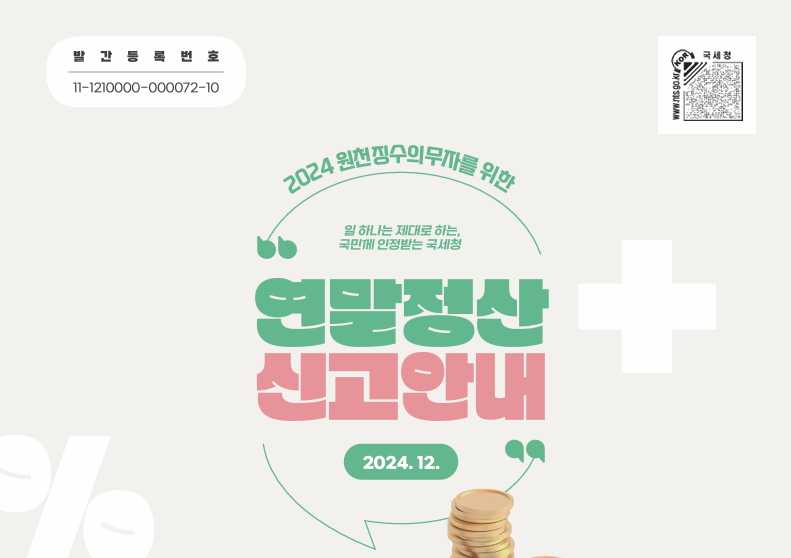

In [ ]:
print(split_docs_pdf[0])
print("----------------")
print(split_docs_mupdf[0])

page_content='연말정산
신고안내
일 하나는 제대로 하는,
국민께 인정받는 국세청
2024. 12.
2024 원천징수의무자를 위한
맞춤형 안내
간소화 서비스
 일괄제공 서비스
발간등록번호
11-1210000-000072-10' metadata={'producer': 'ezPDF Builder Supreme', 'creator': 'PyPDF', 'creationdate': '2024-12-22T23:44:00+09:00', 'moddate': '2025-01-09T17:28:20+09:00', 'source': '2024년원천징수의무자를위한연말정산신고안내.pdf', 'total_pages': 426, 'page': 0, 'page_label': '1'}
----------------
page_content='연말정산
신고안내
일 하나는 제대로 하는,
국민께 인정받는 국세청
2024. 12.
2
0
2
4
 
원
천
징
수
의
무
자
를
 
위
한
맞춤형 안내
간소화 서비스
일괄제공 서비스
발
간
등
록
번
호
11-1210000-000072-10' metadata={'producer': 'ezPDF Builder Supreme', 'creator': '', 'creationdate': '2024-12-22T23:44:00+09:00', 'source': '2024년원천징수의무자를위한연말정산신고안내.pdf', 'file_path': '2024년원천징수의무자를위한연말정산신고안내.pdf', 'total_pages': 426, 'format': 'PDF 1.6', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2025-01-09T17:28:20+09:00', 'trapped': '', 'modDate': "D:20250109172820+09'00'", 'creationDate': "D:20241222234400+09'00'", 'page': 0}


- 가장 첫 페이지(표지)를 어떤식으로 저장했는지 비교해보면 pdf 내에서 글자가 일직선상에 있지 않거나 글자가 한칸씩 띄워져 있는 경우 PyMuPDFLoader 는 그걸 다 반영해서 글자 + 줄바꿈으로 저장한 반면 PyPDFLoader의 경우는 글자를 이어서 저장함 -> PyPDFLoader가 더 잘 text를 추출 했음

## 표

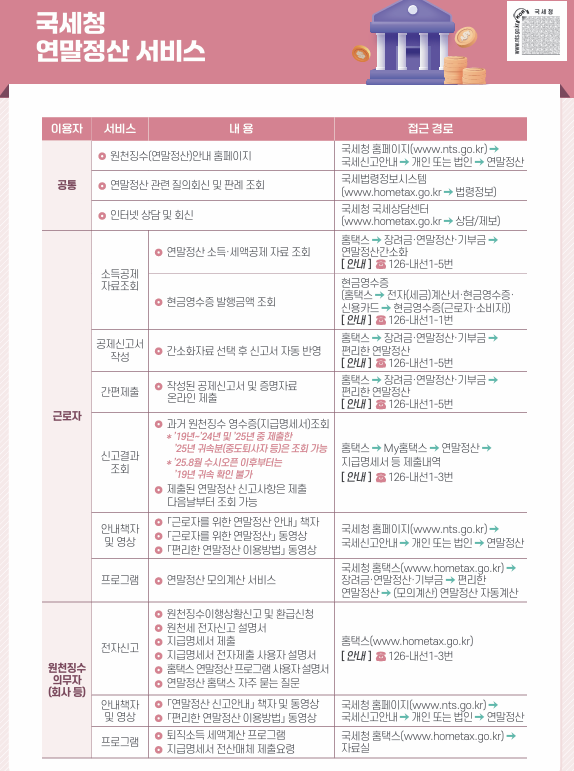

In [ ]:
print(split_docs_pdf[2])
print("--------------------------------------")
print(split_docs_mupdf[2])

page_content='국세청  
연말정산 서비스
이용자 서비스 내 용 접근 경로
공통
  원천징수(연말정산)안내 홈페이지 국세청 홈페이지(www.nts.go.kr) 
국세신고안내  개인 또는 법인  연말정산
  연말정산 관련 질의회신 및 판례 조회 국세법령정보시스템
(www.hometax.go.kr  법령정보)
  인터넷 상담 및 회신 국세청 국세상담센터
(www.hometax.go.kr  상담/제보)
근로자
소득공제
자료조회
  연말정산 소득·세액공제 자료 조회
홈택스  장려금·연말정산·기부금   
연말정산간소화
[ 안내 ]   126-내선1-5번
  현금영수증 발행금액 조회
현금영수증 
(홈택스  전자(세금)계산서·현금영수증· 
신용카드  현금영수증(근로자·소비자))
[ 안내 ]   126-내선1-1번
공제신고서
작성   간소화자료 선택 후 신고서 자동 반영
홈택스  장려금·연말정산·기부금   
편리한 연말정산
[ 안내 ]   126-내선1-5번
간편제출     작성된 공제신고서 및 증명자료  
온라인 제출
홈택스  장려금·연말정산·기부금   
편리한 연말정산
[ 안내 ]   126-내선1-5번
신고결과
조회
  과거 원천징수 영수증(지급명세서)조회
*   ’19년~’24년 및 ’25년 중 제출한 
’25년 귀속분(중도퇴사자 등)은 조회 가능
*   ’25.8월 수시오픈 이후부터는 
’19년 귀속 확인 불가
    제출된 연말정산 신고사항은 제출  
다음날부터 조회 가능
홈택스  My홈택스  연말정산   
지급명세서 등 제출내역
[ 안내 ]   126-내선1-3번
안내책자
및 영상
  「근로자를 위한 연말정산 안내」 책자
  「근로자를 위한 연말정산」 동영상
  「편리한 연말정산 이용방법」 동영상
국세청 홈페이지(www.nts.go.kr) 
국세신고안내  개인 또는 법인  연말정산
프로그램   연말정산 모의계산 서비스
국세청 홈택스(www.hometax.go.kr) 
장려금·연말정산·기부금  편리한  
연말정산  

- 두 로더 모두 표에 담긴 모든 텍스트 정보를 누락 없이 추출함

- 각 셀에 해당하는 텍스트(이용자, 서비스 내용, 접근 경로, 안내 번호 등)는 모두 포함되어 있음

- PyMuPDFLoader는 표의 레이아웃을 그대로 인식하지는 못하지만,
줄바꿈을 통해 항목을 더 잘 구분해서
표에 담긴 정보의 구조를 더 명확하게 드러냄.
-> 표 부분에서는 PyMuPDFLoader 가 더 낫다는 판단

## 의미단위 청킹

In [10]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
    separators=["\n\n", "\n", ".", " "] # 의미 단위 fallback 분할
)
split_docs = text_splitter.split_documents(documents_pdf)

In [11]:
print(split_docs[4])

page_content='고용관계 또는 이와 유사한 계약에 의하여 근로를 제공하고 지급받는 모든 대가 등 
(다만, 일용근로소득 제외)
※ 연간 근로소득은 비과세소득을 포함하며 일반적으로 「연봉」을 말함
  실비변상적 급여
    자기차량운전보조금(본인명의 임대차량 포함, 월 20만원 이내), 연구보조비(월 20만원 이내),  
회사지급규정에 의해 지급받는 여비 등
  국외근로소득(월 100만원 또는 500만원 이내)
  비과세 학자금, 근로장학금
    생산 및 그 관련직에 종사하는 근로자의 연장근로 등으로 인하여 받는 급여(연 240만원 이내)
  현물식사 또는 월 20만원 이하 식사대
  6세 이하의 자녀 보육수당(월 20만원 이내)
  자녀 출생일 이후 2년 이내에 회사로부터 지급(2회 이내)받는 급여(한도 없음)
*   ’24년에 수당 지급 시 ’21.1.1. 이후 출생자에 대한 지급분 포함
  고용보험법 등에 따라 받는 육아휴직급여, 출산전후 휴가급여 등
  연 700만원 이하의 직무발명보상금
( = 연간 근로소득 - 비과세소득 )  ※   총급여액은 의료비, 연금계좌, 월세액 세액공제·신용카드 등  
소득공제 적용 시 활용
총급여액 공제액 
(2,000만원 한도)
공제액 
(2,000만원 한도, 속산표)
500만원 이하 총급여액의 70% 총급여액의 70%
500만원 초과 1,500만원 이하350만원 + 500만원 초과액의 40% 총급여액 × 40% + 150만원
1,500만원 초과 4,500만원 이하750만원 + 1,500만원 초과액의 15%총급여액 × 15% + 525만원
4,500만원 초과 1억원 이하 1,200만원 + 4,500만원 초과액의 5% 총급여액 ×   5% + 975만원
1억원 초과 1,475만원 + 1억원 초과액의 2% 총급여액 ×   2% + 1,275만원
( = 총급여액 - 근로소득공제 )  ※   근로소득금액은 기부금·중소기업창업투자조합, 소기업소상공인  
소득공제 한도적용시 활용' metadata={'producer': '

- PyPDFLoader 를 사용하고 / 의미 단위 fallback 분할을 사용한 청킹을 최종 청킹으로 설정

## 임베딩 생성 및 벡터 데이터베이스에 저장
- 임베딩 모델 선택
- 벡터 데이터베이스 선택


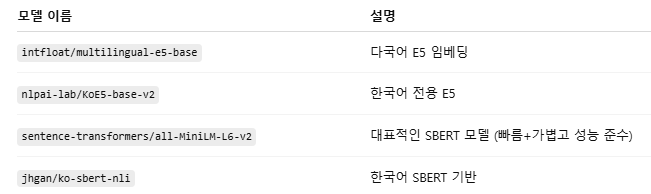

In [12]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGrained).
The token `exercise` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate

## model = SentenceTransformer("nlpai-lab/KURE-v1")

In [13]:
from langchain.embeddings import HuggingFaceEmbeddings
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("nlpai-lab/KURE-v1")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/220 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [16]:
from tqdm import tqdm

texts = [doc.page_content for doc in tqdm(split_docs)]
embeddings = model.encode(texts, batch_size=16, show_progress_bar=True)

100%|██████████| 637/637 [00:00<00:00, 1073863.20it/s]


Batches:   0%|          | 0/40 [00:00<?, ?it/s]

In [17]:
print(embeddings.shape)

(637, 1024)


In [18]:
!pip install faiss-cpu

## Vector DB

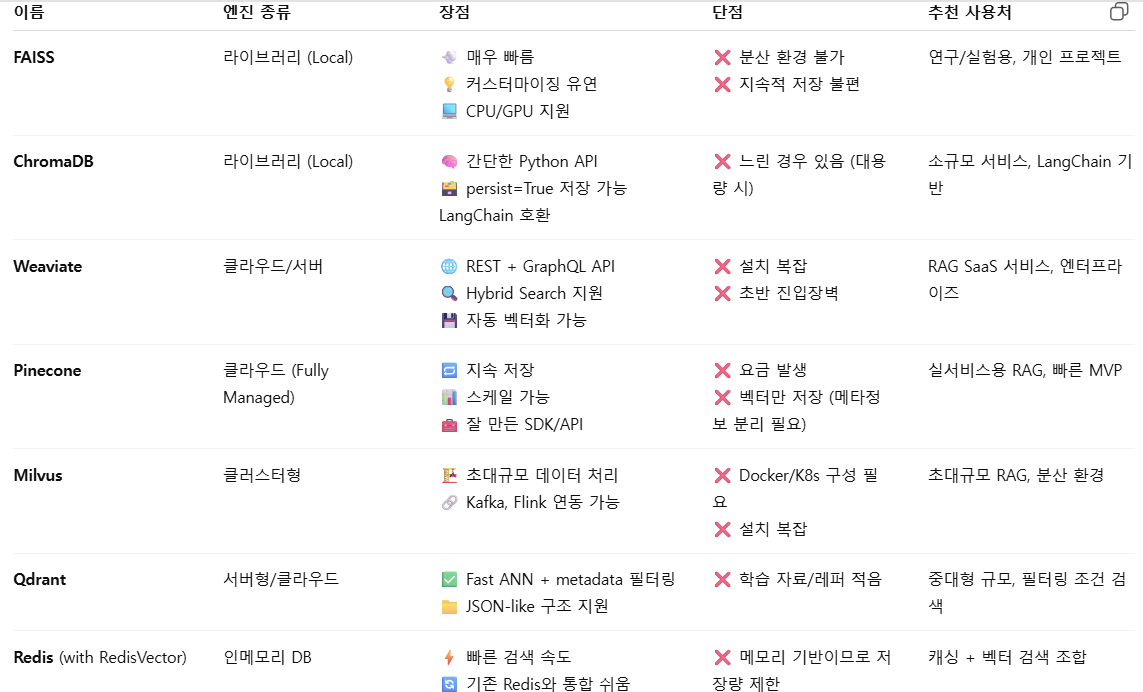

## FAISS

In [19]:
import faiss
import pickle
import numpy as np

In [20]:
# 3. FAISS 인덱스 생성 (cosine similarity용으로 normalize)
def normalize(vectors):
    return vectors / np.linalg.norm(vectors, axis=1, keepdims=True)

normalized_embeddings = normalize(np.array(embeddings))

# cosine similarity → IndexFlatIP (inner product)
index = faiss.IndexFlatIP(normalized_embeddings.shape[1])
index.add(normalized_embeddings)

# 4. FAISS 인덱스 저장
faiss.write_index(index, "faiss_index_cosine.bin")

# 5. 원문 문서도 저장 (retrieval용)
with open("documents.pkl", "wb") as f:
    pickle.dump(texts, f)

print("FAISS 인덱스 및 문서 저장 완료")

FAISS 인덱스 및 문서 저장 완료


In [21]:
import numpy as np

# 1. 쿼리 설정
query = "2024년 개정 세법 중에 월세와 관련한 내용이 있을까?"

# 2. 쿼리 임베딩 (KURE-v1은 E5 포맷 불필요)
query_embedding = model.encode([query], show_progress_bar=False)
query_embedding = query_embedding / np.linalg.norm(query_embedding, axis=1, keepdims=True)  # normalize

# 3. FAISS로 Top-5 검색
D, I = index.search(query_embedding, k=10)  # D: 유사도, I: 인덱스

# 4. 결과 출력
print(" [Query] :", query)
print("")

for rank, (score, idx) in enumerate(zip(D[0], I[0]), 1):
    print(f" Top {rank} | 유사도: {score:.4f}")
    print(f" 문장: {texts[idx][:300]}")  # 너무 길면 300자만
    print("-" * 50)

 [Query] : 2024년 개정 세법 중에 월세와 관련한 내용이 있을까?

 Top 1 | 유사도: 0.6808
 문장: 01. 2024년 귀속 연말정산 개정세법 요약
17
24 월세액 세액공제 소득기준 및 한도 상향 
(조세특례제한법 제95조의2, 제122조의3)
<개정취지> 서민·중산층 주거비 부담 완화
종          전 개          정
▢ 월세 세액공제 ▢ 소득기준 및 한도 상향
○ (대상) 총급여 7천만원(종합소득금액 6천만원) 이하 무
주택근로자 및 성실사업자 등
○ 총급여 8천만원(종합소득금액 7천만원) 이하 무주택
근로자 및 성실사업자 등
○ (공제율) 월세액의 15% 또는 17%*
   ＊ 총급여 5,500만원 또는 종합소득
--------------------------------------------------
 Top 2 | 유사도: 0.6426
 문장: Ⅰ. 2024년 귀속 연말정산 종합사례
223
(10쪽 중 제9쪽)
[  ] 월세액·[  ] 거주자 간 주택임차차입금 원리금 상환액 소득·세액공제 명세서
[무주택자 해당여부 [  ]여, [  ]부]
1. 인적사항
① 상 호 ② 사업자등록번호
③ 성 명 ④ 주민등록번호
⑤ 주 소 (전화번호：                     )
⑥ 사업장 소재지 (전화번호：                     )
2. 월세액 세액공제 명세
⑦ 임대인성명
   (상    호)
⑧ 주민등록번호
   (사업자번호)
⑨
유형
⑩계약면적
(㎡)
⑪
임대차계
--------------------------------------------------
 Top 3 | 유사도: 0.6335
 문장: 01. 2024년 귀속 연말정산 개정세법 요약
7
10 주택자금 대여 이익 비과세 대상 조정 
(소득세법 시행령 제17조의4)
<개정취지> 과세형평 제고
종          전 개      정
▢ 비과세 되는 복리후생적 급여 ▢ 주택자금대여이익 비과세 대상 중소기업 종업원 범위 조정
○ 사택제공 이익 등 ○ (

In [1]:
!pip install sentence-transformers faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [22]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import pickle # FAISS 인덱스나 문서 정보(예: 텍스트, 메타데이터)를 디스크에 저장하거나 불러오기 위해 사용

## 언어 모델 및 토크나이저 설정
- Hugging Face에서 어떤 모델을 사용하면 좋을지 결정해 주세요. 특히 한국어로 질문하고 응답받고 싶을 경우에는 언어도 고려하여 모델을 선정해야 합니다.
- 필요한 경우 양자화를 통해 메모리 부하를 줄이고 응답 속도를 높여 보세요.
Temperature, penalty 등 텍스트 생성과 관련된 다양한 옵션을 적절한 값으로 설정해 주세요.

## model = "nlpai-lab/KULLM3"

In [23]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

MODEL_DIR = "nlpai-lab/KULLM3"

tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR)
model = AutoModelForCausalLM.from_pretrained(
    MODEL_DIR,
    device_map="auto",
    torch_dtype=torch.float16
)

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/784 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.69G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

## RAG 구현
- 사용자의 질문이 들어왔을 때, 연관된 문서 청크를 찾아 맥락으로 활용해 답변을 생성하는 RAG 시스템을 구현합니다.

## 다양한 질문 입력 및 성능 평가
- RAG 시스템에 여러 질문을 던져 보면서 적절한 답변이 나오는지 평가합니다.
- 질문은 문서 내용에 기반하여 답변의 정확성을 검증할 수 있는 질문이어야 좋습니다. 예를 들어 연말 정산 문서로 RAG 시스템을 구현했을 경우, 다음과 같은 질문을 해 볼 수 있습니다.
 - 연말 정산 때 비거주자가 주의할 점을 알려 줘.
 - 2024년 개정 세법 중에 월세와 관련한 내용이 있을까?

In [27]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from sentence_transformers import SentenceTransformer
import faiss
import pickle
import torch

# ----------------------------
# 🔧 설정
# ----------------------------
EMBED_MODEL = "nlpai-lab/KURE-v1"   # 문서/query 임베딩용
LLM_MODEL = "nlpai-lab/KULLM3"      # 응답 생성용
FAISS_INDEX_PATH = "faiss_index_cosine.bin"
DOCS_PKL_PATH = "documents.pkl"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ----------------------------
# 📦 모델 로딩
# ----------------------------
print("🔎 Loading KURE-v1 on CPU...")
embed_model = SentenceTransformer(EMBED_MODEL, device="cpu")

print("📦 Loading FAISS index and documents...")
index = faiss.read_index(FAISS_INDEX_PATH)
with open(DOCS_PKL_PATH, "rb") as f:
    documents = pickle.load(f)

print("🧠 Loading KULLM3 model...")
tokenizer = AutoTokenizer.from_pretrained(LLM_MODEL)
model = AutoModelForCausalLM.from_pretrained(
    LLM_MODEL,
    device_map="auto",
    torch_dtype=torch.float16,
)

# ----------------------------
# ✅ 프롬프트 생성 함수
# ----------------------------
def build_prompt(query: str, top_k_docs: list[str]) -> str:
    context = "\n\n".join(f"<문서{i+1}>\n{doc}" for i, doc in enumerate(top_k_docs))
    prompt = f"""
다음은 사용자의 질문에 대한 답변을 생성하기 위한 관련 문서들입니다.

{context}

사용자 질문: "{query}"

이 문서들만을 참고하여 질문에 대해 정확하고 간결하게 한국어로 대답하세요.
문서에 명시된 사실만 기반으로 하며, 모르면 모른다고 답하세요.

답변:
"""
    return prompt.strip()

# ----------------------------
# 🔍 질문 처리 함수
# ----------------------------
def rag_ask(query: str, k: int = 2) -> str:
    print("💬 질문:", query)

    # 1. 임베딩
    query_embedding = embed_model.encode([query], normalize_embeddings=True)

    # 2. FAISS 검색
    D, I = index.search(query_embedding, k)
    top_k_docs = [documents[i] for i in I[0]]

    print("\n📚 Top 문서:")
    for idx, doc in enumerate(top_k_docs, 1):
        print(f"\n[문서 {idx}]\n{doc[:500]}...")  # 앞부분만 표시

    # 3. 프롬프트 생성
    prompt = build_prompt(query, top_k_docs)

    # 4. LLM 응답 생성
    print("\n⚙️ Generating answer...\n")
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=4096).to(model.device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=256,
            temperature=0.2,
            do_sample=False
        )
    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    answer = decoded.split("답변:")[-1].strip()

    return answer

# ----------------------------
# ✅ 실행 예시
# ----------------------------
if __name__ == "__main__":
    query = "2024년 개정 세법 중에 월세와 관련한 내용이 있을까?"
    answer = rag_ask(query)
    print("\n🧠 최종 답변:\n", answer)

🔎 Loading KURE-v1 on CPU...
📦 Loading FAISS index and documents...
🧠 Loading KULLM3 model...


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

💬 질문: 2024년 개정 세법 중에 월세와 관련한 내용이 있을까?


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



📚 Top 문서:

[문서 1]
01. 2024년 귀속 연말정산 개정세법 요약
17
24 월세액 세액공제 소득기준 및 한도 상향 
(조세특례제한법 제95조의2, 제122조의3)
<개정취지> 서민·중산층 주거비 부담 완화
종          전 개          정
▢ 월세 세액공제 ▢ 소득기준 및 한도 상향
○ (대상) 총급여 7천만원(종합소득금액 6천만원) 이하 무
주택근로자 및 성실사업자 등
○ 총급여 8천만원(종합소득금액 7천만원) 이하 무주택
근로자 및 성실사업자 등
○ (공제율) 월세액의 15% 또는 17%*
   ＊ 총급여 5,500만원 또는 종합소득금액 4,500만원 이하자
○ (좌  동)
○ (공제한도) 연간 월세액 750만원 ○ 750만원 → 1,000만원
○ (대상 주택) 국민주택규모(85㎡) 이하 또는 기준시가 
4억원 이하
○ (좌  동)
<적용시기> 2024.1.1. 이후 개시하는 과세연도 분부터 적용
25 신용카드 소득공제율 한시 상향 등
                           ...

[문서 2]
Ⅰ. 2024년 귀속 연말정산 종합사례
223
(10쪽 중 제9쪽)
[  ] 월세액·[  ] 거주자 간 주택임차차입금 원리금 상환액 소득·세액공제 명세서
[무주택자 해당여부 [  ]여, [  ]부]
1. 인적사항
① 상 호 ② 사업자등록번호
③ 성 명 ④ 주민등록번호
⑤ 주 소 (전화번호：                     )
⑥ 사업장 소재지 (전화번호：                     )
2. 월세액 세액공제 명세
⑦ 임대인성명
   (상    호)
⑧ 주민등록번호
   (사업자번호)
⑨
유형
⑩계약면적
(㎡)
⑪
임대차계약서 상 주소지
⑫ 계약서 상 임대차 계약기간 ⑬
연간월세액(원)
⑭
세액공제금액(원)개시일 종료일
※⑨유형：구분코드 - 단독주택：1, 다가구：2, 다세대주택：3, 연립주택：4, 아파트：5, 오피스텔：6, 고시원：7, 기타：8
※⑫계약서상 임대차계약기간 - 개시일과 종료일은 예시와 같이 기재 (예시) 

In [29]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from sentence_transformers import SentenceTransformer
import faiss
import pickle
import torch

# ----------------------------
# 🔧 설정
# ----------------------------
EMBED_MODEL = "nlpai-lab/KURE-v1"   # 문서/query 임베딩용
LLM_MODEL = "nlpai-lab/KULLM3"      # 응답 생성용
FAISS_INDEX_PATH = "faiss_index_cosine.bin"
DOCS_PKL_PATH = "documents.pkl"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ----------------------------
# 📦 모델 로딩
# ----------------------------
print("🔎 Loading KURE-v1 on CPU...")
embed_model = SentenceTransformer(EMBED_MODEL, device="cpu")

print("📦 Loading FAISS index and documents...")
index = faiss.read_index(FAISS_INDEX_PATH)
with open(DOCS_PKL_PATH, "rb") as f:
    documents = pickle.load(f)

print("🧠 Loading KULLM3 model...")
tokenizer = AutoTokenizer.from_pretrained(LLM_MODEL)
model = AutoModelForCausalLM.from_pretrained(
    LLM_MODEL,
    device_map="auto",
    torch_dtype=torch.float16,
)

# ----------------------------
# ✅ 프롬프트 생성 함수
# ----------------------------
def build_prompt(query: str, top_k_docs: list[str]) -> str:
    context = "\n\n".join(f"<문서{i+1}>\n{doc}" for i, doc in enumerate(top_k_docs))
    prompt = f"""
다음은 사용자의 질문에 대한 답변을 생성하기 위한 관련 문서들입니다.

{context}

사용자 질문: "{query}"

이 문서들만을 참고하여 질문에 대해 정확하고 간결하게 한국어로 대답하세요.
문서에 명시된 사실만 기반으로 하며, 모르면 모른다고 답하세요.

답변:
"""
    return prompt.strip()

# ----------------------------
# 🔍 질문 처리 함수
# ----------------------------
def rag_ask(query: str, k: int = 1) -> str:
    print("💬 질문:", query)

    # 1. 임베딩
    query_embedding = embed_model.encode([query], normalize_embeddings=True)

    # 2. FAISS 검색
    D, I = index.search(query_embedding, k)
    top_k_docs = [documents[i] for i in I[0]]

    print("\n📚 Top 문서:")
    for idx, doc in enumerate(top_k_docs, 1):
        print(f"\n[문서 {idx}]\n{doc[:500]}...")  # 앞부분만 표시

    # 3. 프롬프트 생성
    prompt = build_prompt(query, top_k_docs)

    # 4. LLM 응답 생성
    print("\n⚙️ Generating answer...\n")
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=4096).to(model.device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=256,
            temperature=0.2,
            do_sample=False
        )
    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    answer = decoded.split("답변:")[-1].strip()

    return answer

# ----------------------------
# ✅ 실행 예시
# ----------------------------
if __name__ == "__main__":
    query = "연말 정산 때 비거주자가 주의할 점을 알려 줘."
    answer = rag_ask(query)
    print("\n🧠 최종 답변:\n", answer)

🔎 Loading KURE-v1 on CPU...
📦 Loading FAISS index and documents...
🧠 Loading KULLM3 model...


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


💬 질문: 연말 정산 때 비거주자가 주의할 점을 알려 줘.

📚 Top 문서:

[문서 1]
원천징수의무자를 위한 
2024년 연말정산 신고안내
90
나. 비거주자의 연말정산
1) 비거주자의 국내원천소득 (소법 §119, 소령 §179)
○ 국내에서 제공하는 근로의 대가로서 받는 급여
○ 거주자 또는 내국법인이 운용하는 외국항행선박·원양어업선박 및 항공기의 승무원이 받는 
급여
○ 내국법인의 임원 자격으로서 받는 급여
○ 법인세법에 따라 상여로 처분된 금액
2) 연말정산 방법 (소법 §122)
  비거주자의 국내원천소득에 해당하는 근로소득에 대한 소득세의 과세표준과 세액의 계산에 
관하여는 거주자에 대한 소득세의 과세표준과 세액의 계산에 관한 규정을 준용한다. 다만, 
｢소득세법｣ 제51조 제3항에 따른 인적공제 중 비거주자 본인 외의 자에 대한 공제와 같은 법 
제52조에 따른 특별소득공제, 제59조의2에 따른 자녀세액공제 및 제59조의4에 따른 특별
세액공제는 하지 아니한다.
예규
국내사업장이 없는 비거주자의 근로소득에 대한 소득세의 과세표준 및 세액의 계산은 소득세법 ...

⚙️ Generating answer...


🧠 최종 답변:
 비거주자는 국내원천소득에 대해 소득세를 과세표준과 세액의 계산에 관한 규정을 준용하며, 인적공제 중 비거주자 본인 외의 자에 대한 공제와 같은 법 제52조에 따른 특별소득공제, 제59조의2에 따른 자녀세액공제 및 제59조의4에 따른 특별세액공제는 하지 않습니다. 또한, 외국인근로자는 해당 과세연도 종료일 현재 대한민국의 국적을 가지지 아니한 사람을 의미하므로, 거주자 중 외국인과 비거주자 중 외국인 근로자를 말합니다. 대한민국 국적을 가진


- 질문 임베딩
- FAISS를 활용한 유사 문서 검색
- top_k의 유사문서를 context로 활용
- 프롬프트 생성 (문서 + 질문)
- LLM(KULLM3)을 통해 답변 생성
- 최종 응답 출력

- OOM 방지: KURE 임베딩 모델은 CPU에 고정하여 GPU 메모리 절약
- 모델 순차 로딩 전략
 - 문서 임베딩/검색 시 GPU 미사용
 - 생성 모델만 GPU 메모리 사용

## 실험 결과 및 회고
- 파라미터가 많은 LLM 모델일수록 모델 용량이 크고 GPU 메모리 사용량이 높음을 확인했습니다.

- 실제로 NVIDIA L4 GPU 환경에서 고성능 임베딩 모델(KURE-v1)과 LLM(KULLM3)을 동시에 GPU에 로딩할 경우 GPU 메모리 초과(OOM) 현상이 발생했습니다.

- LLM은 단어 생성을 위한 연산이 매우 많아 성능이 좋을수록 GPU 자원을 많이 소모한다는 것을 체감할 수 있었습니다.

- 이러한 한계를 극복하기 위해 양자화(Quantization) 등 다양한 최적화 기법들이 사용되고 있으며, 이를 통해 학습 및 추론 비용을 줄이려는 시도가 있다는 점을 이해하게 되었습니다.

- 더 정확한 답변을 유도하기 위해 청킹(chunking) 단위를 키우고, query와의 유사도가 높은 문서를 context로 최대한 많이 활용하려 했으나,

→ 문서가 많아질수록 입력 길이 증가로 인해 추론 시간이 급격히 늘어남을 확인했습니다.

→ A100과 같은 고성능 GPU를 사용했음에도 응답 생성이 지연되거나 실패하는 사례가 발생했습니다.

- 이를 통해 입력 데이터의 전처리 전략과 프롬프트 설계(Prompt Engineering)가 LLM 추론 성능과 속도에 중대한 영향을 미친다는 것을 알게 되었습니다.

- 향후에는 다양한 검색 설정(top-k 변경, 청킹 크기 조절 등)을 통한 retrieval 실험 결과 비교가 필요하며, 이 또한 성능 최적화의 핵심 과제로 남아 있습니다.

## (심화) 고급 RAG 기법 실험
- 기본 RAG 구현을 완료했다면, 더 나아가 다양한 고급 기법들을 구현해 보고 성능이 나아지는지 확인해 보세요.
- Hybrid searching, multi-query retrieval, contextual compression, reranking 등을 실험해 볼 수 있습니다.

## (심화) Hugging Face 외의 LLM API 실험
- 여유가 있다면, OpenAI API 등 Hugging Face가 아닌 LLM API를 사용해 RAG 시스템을 만들어 보고, 성능을 비교해 보는 것도 좋습니다.